IBNU GILANG PRADUTA CIPTA
2209106040
INFORMATIKA A22

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

SIAPKAN LIBRARY YANG AKAN KITA PAKAI

In [17]:
df_ibnu = pd.read_csv('bank-full.csv') 
df_ibnu.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


DISINI KITA MANMPILKAN DATA YANG AKAN KITA ANALISIS

In [18]:
df_ibnu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


LALU DISINI MENAMPILKAN INFO DATASET

In [19]:
X = df_ibnu[['duration', 'age','balance']] 
y = df_ibnu['day']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DISINI KITA MEMISAHKAN DATA MENJADI 2 SUBSET: SATU UNTUK PELATIHAN MODEL DAN SATU UNTUK PENGUJIAN MODEL

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

disini kita memiliki model regresi linier yang telah dilatih dan siap digunakan untuk membuat prediksi berdasarkan atribut yang diberikan

In [21]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 7.045387959328209
Mean Squared Error (MSE): 68.89589737883708
Root Mean Squared Error (RMSE): 8.300355256182538
R-squared (R2) Score: 0.002025444735853532


In [22]:
df_ibnu = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

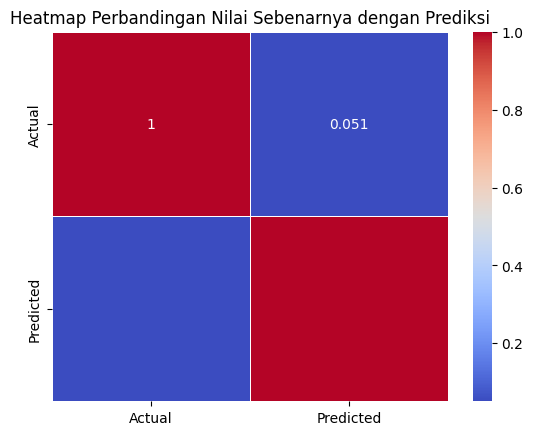

In [23]:
sns.heatmap(df_ibnu.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Perbandingan Nilai Sebenarnya dengan Prediksi")
plt.show()

In [24]:
df_ibnu1 = pd.read_csv('bank-full.csv')

k = 4

In [25]:
df_ibnu1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
selected_features = df_ibnu1[['duration', 'age','balance']]
kmeans = KMeans(n_clusters=k, random_state=0)

In [29]:
kmeans.fit(selected_features)
labels = kmeans.labels_

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
centroids = kmeans.cluster_centers_
df_ibnu1['Cluster'] = labels

In [31]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 72702517199.97566


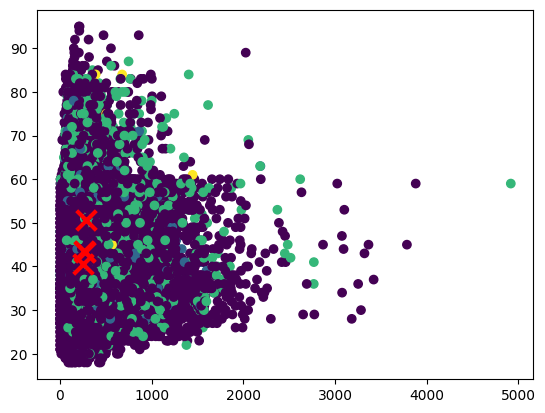

In [32]:
plt.scatter(df_ibnu1['duration'], df_ibnu1['age'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()